# Initial Setup

## Setting Up Matplotlib for "Prettier" Charts

### Reference  
This code was taken from [Aurélien Géron's Hands-On ML GitHub Notebook](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb).


In [78]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Download the Data

In [79]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/misterRoshi22/Machine-Learning_Final-Project_GPU-Runtime-Prediction-/main/sgemm_product.csv"
data = pd.read_csv(csv_url)

data.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


# Data Exploration

In [80]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [82]:
data.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


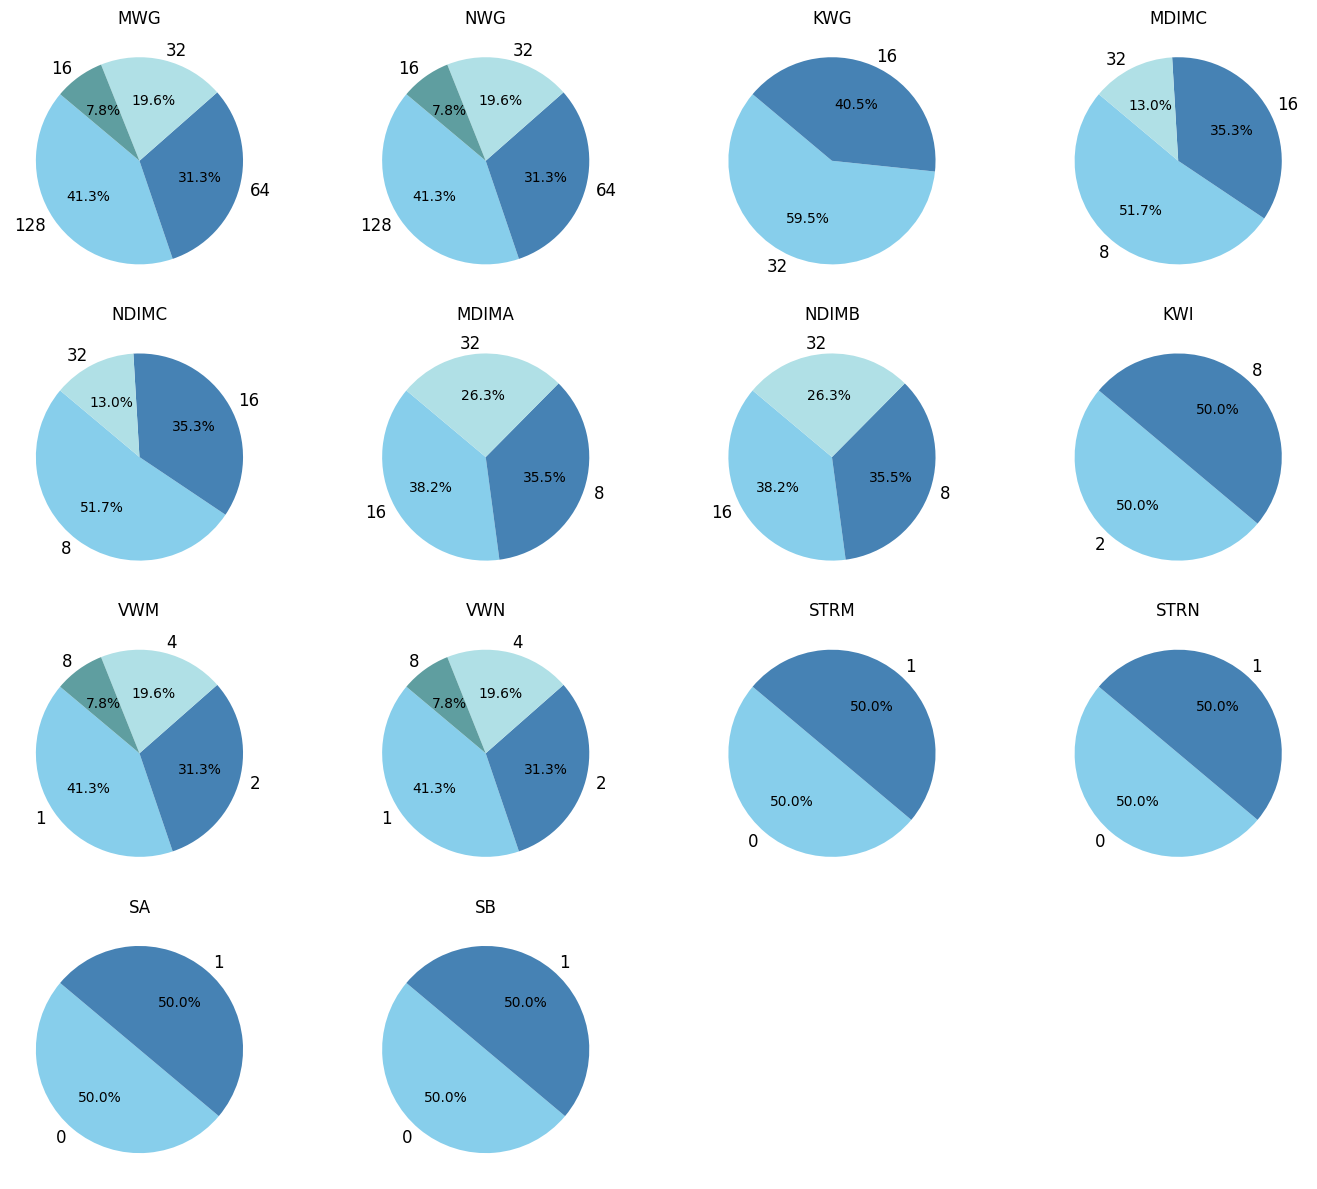

In [83]:
import matplotlib.pyplot as plt

# Define a custom color palette with shades of sky blue
custom_colors = ['#87CEEB', '#4682B4', '#B0E0E6', '#5F9EA0', '#00BFFF']

# Exclude the last 4 columns
columns_to_plot = data.columns[:-4]  # Select all except the last 4 features

# Define number of rows and columns for the grid
num_cols = 4
num_rows = -(-len(columns_to_plot) // num_cols)  # Calculate rows needed (ceil division)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 3 * num_rows))  # Adjust figsize
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each column and plot pie charts
for i, column in enumerate(columns_to_plot):
    counts = data[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors[:len(counts)])
    axes[i].set_title(f"{column}", fontsize=12)

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Add space between charts

plt.tight_layout()
plt.show()


## Exploring the 4 independent Runs

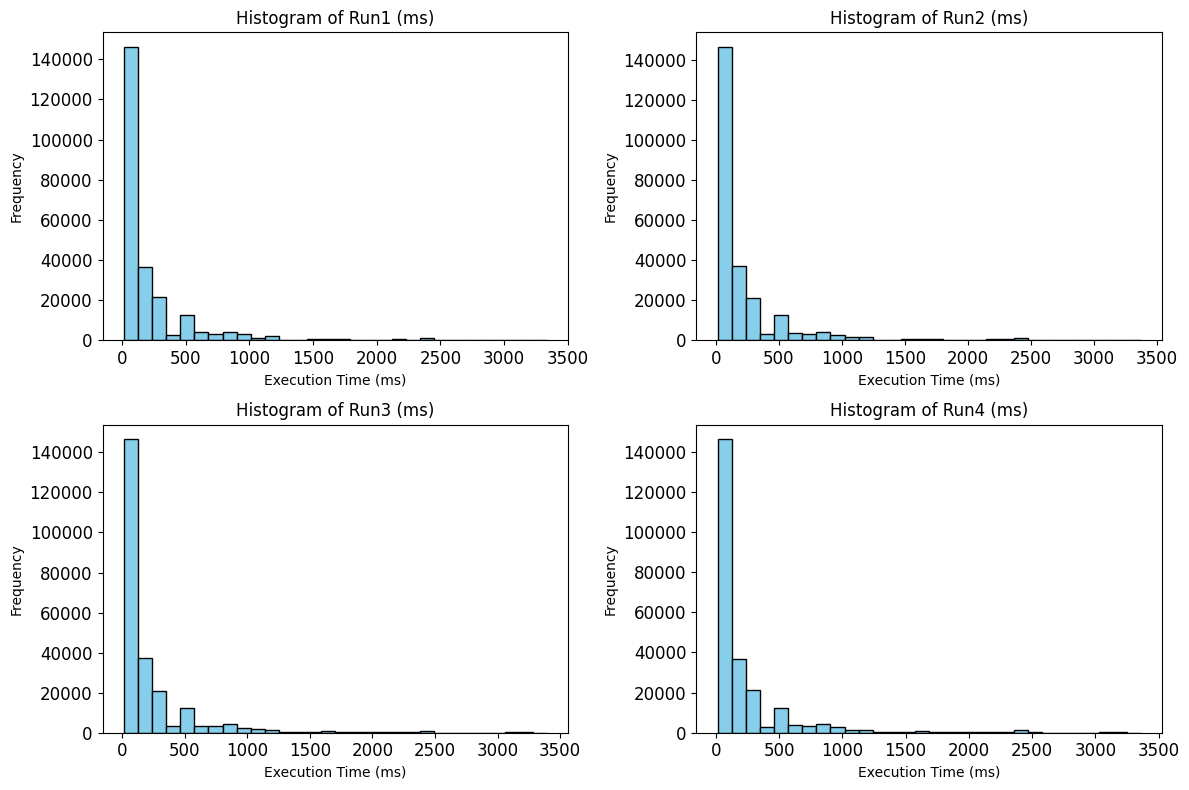

In [84]:
import matplotlib.pyplot as plt

# List of columns representing the runs
run_columns = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 histograms
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each column and plot its histogram
for i, column in enumerate(run_columns):
    axes[i].hist(data[column], bins=30, color='#87CEEB', edgecolor='black')  # Sky blue color
    axes[i].set_title(f'Histogram of {column}', fontsize=12)
    axes[i].set_xlabel('Execution Time (ms)', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Adjust layout spacing
plt.tight_layout()
plt.show()


# Data Engineering

## Changing Label

Taking Average of 4 indpendent runs then taking the Natural Log

Average Run Variance: 135976.68107883184
Average Run Mean: 217.57195309395698
Average Run Mode: 38.76
Log Runs Variance: 1.2736306064403724
Log Runs Mean: 4.623014911842701
Log Runs Mode: 4.259859000699674


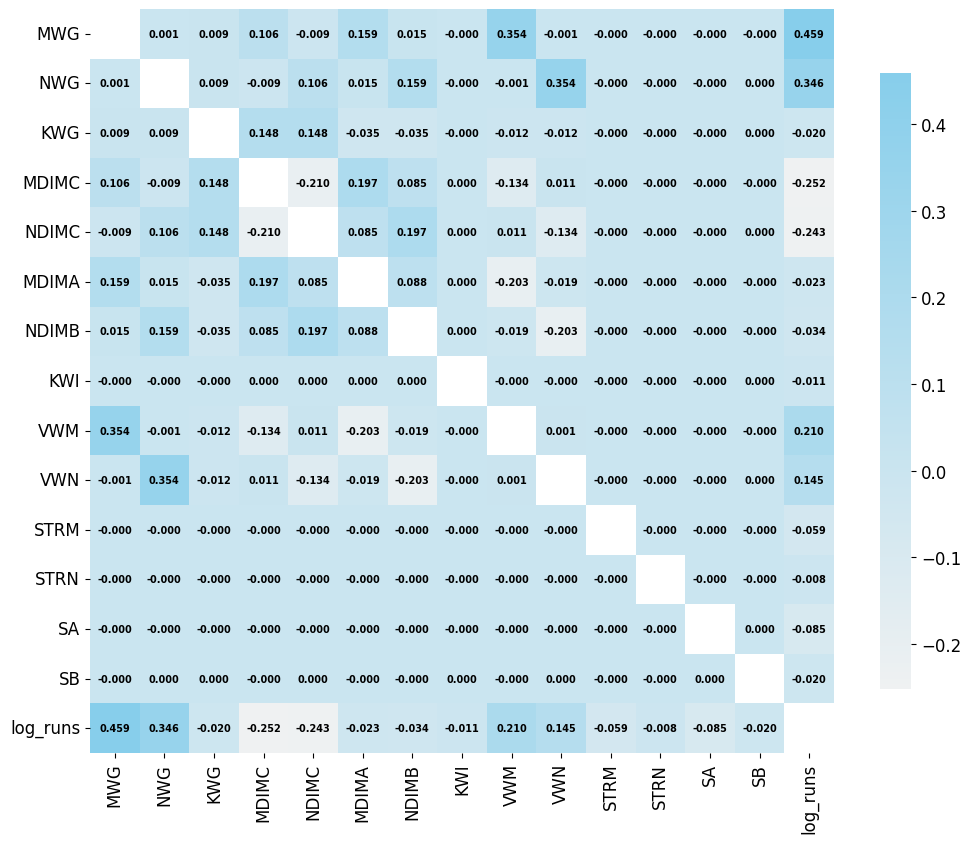

In [85]:
import numpy as np

# Assuming data is a pandas DataFrame
# Calculate average and log mean
data['average_run'] = data[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)
log_runs = np.log(data[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']])
data['log_runs'] = log_runs.mean(axis=1)

# Variance, Mean, and Mode calculations
average_run_variance = data['average_run'].var()
average_run_mean = data['average_run'].mean()
average_run_mode = data['average_run'].mode()[0]

log_runs_variance = data['log_runs'].var()
log_runs_mean = data['log_runs'].mean()
log_runs_mode = data['log_runs'].mode()[0]

print(f"Average Run Variance: {average_run_variance}")
print(f"Average Run Mean: {average_run_mean}")
print(f"Average Run Mode: {average_run_mode}")

print(f"Log Runs Variance: {log_runs_variance}")
print(f"Log Runs Mean: {log_runs_mean}")
print(f"Log Runs Mode: {log_runs_mode}")

# Drop unnecessary columns
data = data.drop(columns=['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)', 'average_run'])

data.head()


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

mask = np.eye(corr_matrix.shape[0], dtype=bool)
plt.figure(figsize=(12,10))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".3f",
    annot_kws={"size": 7, "color": "black", "weight": "bold"},
    cmap=sns.light_palette("skyblue", as_cmap=True),
    square=True,
    cbar_kws={"shrink": 0.8},
)

plt.show()



## Promising New Feature


```python
data["execution_complexity"] = data["MWG"] * data["NWG"] * data["KWG"]  # Combined execution complexity
```


In [ ]:
data["execution_complexity"] = data["MWG"] * data["NWG"] * data["KWG"]  # Combined execution complexity
data.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_runs,execution_complexity
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,4.756715,4096
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,4.365685,4096
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,4.389050,4096
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,4.461450,4096
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,4.775796,4096


In [ ]:
corr_matrix = data.corr()
corr_matrix["log_runs"].sort_values(ascending=False)

,log_runs
log_runs,1.000000
execution_complexity,0.513418
MWG,0.459049
NWG,0.346424
VWM,0.209580
VWN,0.145030
STRN,-0.007791
KWI,-0.011201
SB,-0.020318
KWG,-0.020367


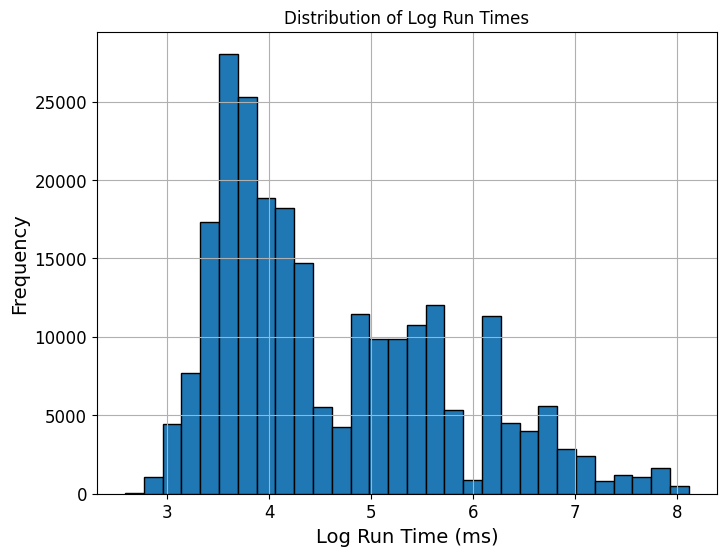

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['log_runs'], bins=30, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Log Run Time (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Log Run Times')
plt.grid(True)
plt.show()

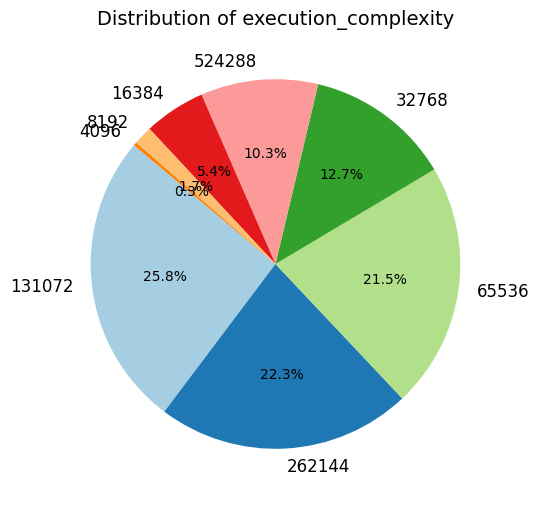

In [ ]:
import matplotlib.pyplot as plt

# Select the column to plot
column_to_plot = "execution_complexity"

# Calculate value counts
counts = data[column_to_plot].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title(f"Distribution of {column_to_plot}", fontsize=14)

# Show the chart
plt.show()


## Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['log_runs'])   # Features
y = data['log_runs']                  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check the shapes to ensure correct splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (193280, 15)
Shape of X_test: (48320, 15)
Shape of y_train: (193280,)
Shape of y_test: (48320,)


## Scaling inputs

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

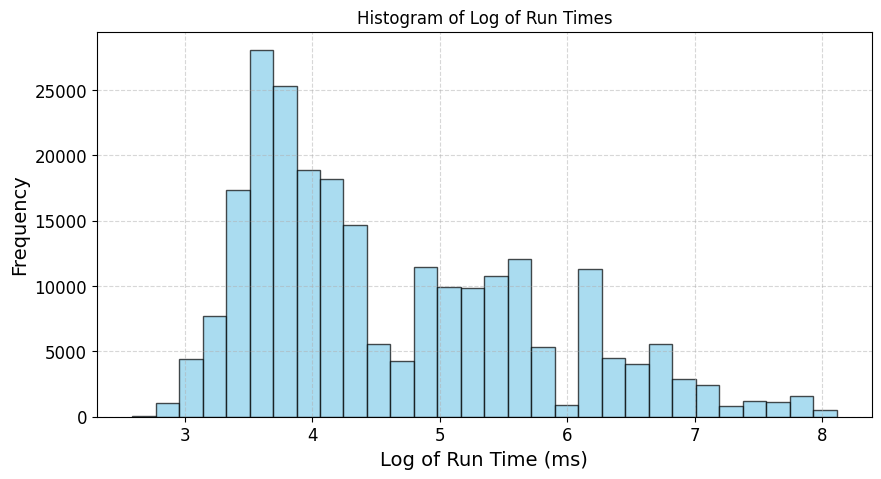

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram for the log of run times
plt.figure(figsize=(10, 5))
plt.hist(data['log_runs'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Log of Run Time (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Log of Run Times')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


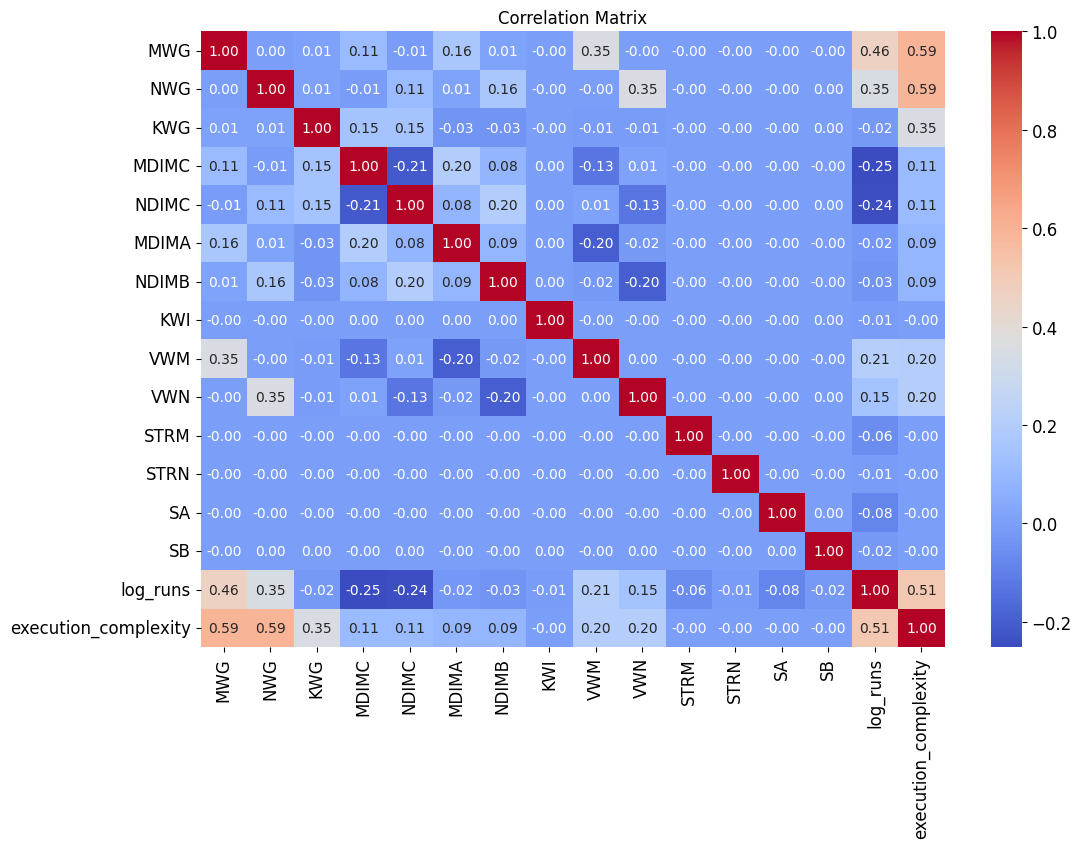

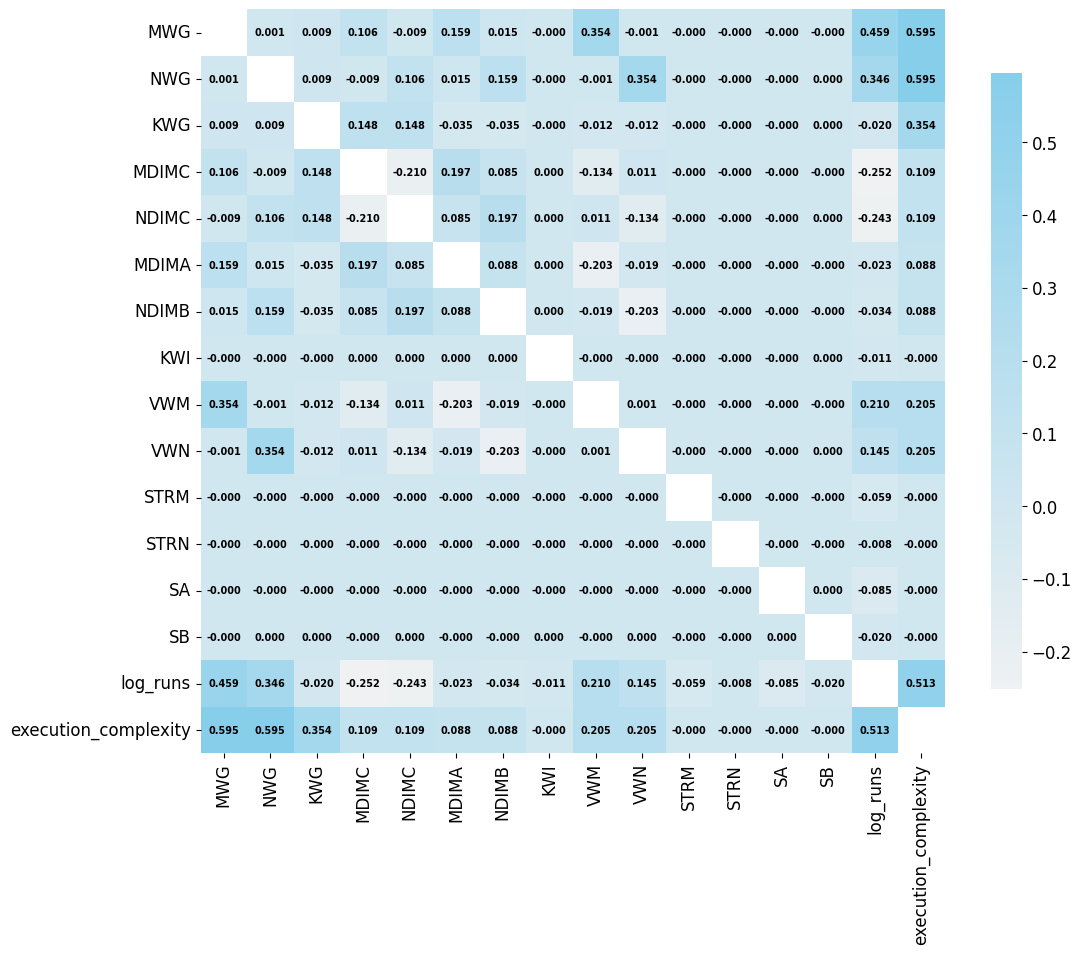

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.savefig("correlation_matrix_plot.png")

mask = np.eye(corr_matrix.shape[0], dtype=bool)
plt.figure(figsize=(12,10))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".3f",
    annot_kws={"size": 7, "color": "black", "weight": "bold"},
    cmap=sns.light_palette("skyblue", as_cmap=True),
    square=True,
    cbar_kws={"shrink": 0.8},
)

plt.show()


In [ ]:
corr_matrix["log_runs"].sort_values(ascending=False)

,log_runs
log_runs,1.000000
execution_complexity,0.513418
MWG,0.459049
NWG,0.346424
VWM,0.209580
VWN,0.145030
STRN,-0.007791
KWI,-0.011201
SB,-0.020318
KWG,-0.020367


# Feature Reduction

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y)
mi_scores


array([0.24523406, 0.22981565, 0.04873011, 0.10146387, 0.1020839 ,
       0.01259223, 0.01297182, 0.06445386, 0.13149528, 0.1340656 ,
       0.0305614 , 0.01761279, 0.10544277, 0.08075087, 0.34721954])

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest


# Convert X_train and X_test back to DataFrames (if they are arrays after the split)
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X.columns)

# Define the threshold for feature importance
threshold = 0.02

# Select features with scores above the threshold
important_features = np.where(mi_scores > threshold)[0]

# Reduce both X_train and X_test to the selected features
X_train_removed = X_train.iloc[:, important_features]
X_test_removed = X_test.iloc[:, important_features]

print("Selected features:", important_features)


Selected features: [ 0  1  2  3  4  7  8  9 10 12 13 14]


# K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN regressor with default hyperparameters
knn = KNeighborsRegressor()  # Default: n_neighbors=5, weights='uniform', metric='minkowski'

# Fit the model to the training data
knn.fit(X_train_removed, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_removed)

# Evaluate test performance
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Test MSE:", test_mse)
print("Test R² Score:", test_r2)


Test MSE: 0.023178200949135246
Test R² Score: 0.9816188058738184


## Determne Best Threshold to Remove Features

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Initialize an array of thresholds to test
thresholds = np.linspace(0.00, 0.25, 25)  # Adjust range and step as needed
r2_scores = []

# Loop through each threshold
for threshold in thresholds:
    # Select features with scores above the threshold
    important_features = np.where(mi_scores > threshold)[0]

    # Reduce both X_train and X_test to the selected features
    X_train_removed = X_train.iloc[:, important_features]
    X_test_removed = X_test.iloc[:, important_features]

    # Train the KNN model with the reduced features
    knn = KNeighborsRegressor()  # Default parameters
    knn.fit(X_train_removed, y_train)
    y_pred = knn.predict(X_test_removed)

    # Calculate and store the R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plot Threshold vs. R² Score
plt.figure(figsize=(8, 6))
plt.plot(thresholds, r2_scores, marker='o')
plt.title('Effect of Threshold on R² Score', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.grid(True)
plt.show()


## Grid Search to find the best parameters

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Select features based on the optimal threshold
important_features = np.where(mi_scores > 0.02)[0]
X_train_removed = X_train.iloc[:, important_features]
X_test_removed = X_test.iloc[:, important_features]

# Define the range of k values (both odd and even)
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

# Initialize lists to store results
r2_scores = []
mse_scores = []

# Test KNN with different values of k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train_removed, y_train)
    y_pred = knn.predict(X_test_removed)

    # Evaluate R² and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    r2_scores.append(r2)
    mse_scores.append(mse)

# Find the best k value based on R² score
best_k_index = np.argmax(r2_scores)  # Index of the best R² score
best_k = k_values[best_k_index]
best_r2 = r2_scores[best_k_index]
best_mse = mse_scores[best_k_index]

# Print the best k and corresponding metrics
print(f"Best k: {best_k}")
print(f"Best R² Score: {best_r2}")
print(f"Best MSE: {best_mse}")

# Save results to a .txt file
with open('knn_results.txt', 'w') as file:
    file.write("k (Number of Neighbors)\tR² Score\tMSE\n")
    for k, r2, mse in zip(k_values, r2_scores, mse_scores):
        file.write(f"{k}\t{r2}\t{mse}\n")
    file.write("\n")
    file.write(f"Best k: {best_k}\n")
    file.write(f"Best R² Score: {best_r2}\n")
    file.write(f"Best MSE: {best_mse}\n")

# Plot R² Score vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', label='R² Score')
plt.title('R² Score vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')
plt.grid(True)
plt.legend()
plt.show()

# Plot MSE vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, marker='o', color='red', label='MSE')
plt.title('MSE vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.show()


## Final Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Select features based on the optimal threshold
important_features = np.where(mi_scores > 0.02)[0]
X_train_removed = X_train.iloc[:, important_features]
X_test_removed = X_test.iloc[:, important_features]


knn = KNeighborsRegressor(n_neighbors=26, weights='distance', metric='manhattan')
knn.fit(X_train_removed, y_train)
y_pred = knn.predict(X_test_removed)

# Evaluate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"MSE: {mse}")

R² Score: 0.9928722516155293
MSE: 0.00898790270294894
